Pandas<a id="top"></a>
===

Avec Numpy, Pandas est aussi l'une des librairie les plus intéressante de Python pour la manipulation des datas, grâce à son format, le dataframe. Si vous arrivez sur ce cours sans connaitre Numpy, je vous conseille de connaitre Numpy avant. En effet, Pandas est en quelque sortes une surcouche de ce dernier.

---

Bonnes sources :
- [Prediction survie Titanic](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)


**Sommaire**
- [1. Import des données](#chap1Pandas)
- [2. Pandas & Numpy](#chap5Pandas)
- [3. Statistiques et gestion des valeurs manquantes](#chap3Pandas)
- [4. Pandas & Matplotlib](#chap4Pandas)
- [5. Pandas & Timeseries](#chap5Pandas)
- [6. Assemblage de dataframes](#chap6Pandas)
- [Trading : Turtle strategy](#exo1Pandas)

In [1]:
from tools import find_file

[Back to top](#top)

---

## 1. Import des données<a id="chap1Pandas"></a>

Commençons par la base, l'import et la visualisation basique :

In [2]:
import pandas as pd

In [3]:
# Import des datas directement depuis le CSV
df = pd.read_csv(find_file('titanic.csv'))

# Print les dimensions
print(df.shape)

# Print les colonnes
print('Liste des noms de colonnes : ' + ', '.join(df.columns))

# Afficher le début du dataframe
df.head()  # On peut aussi utiliser la fonction tail()pour afficher la fin

(1310, 14)
Liste des noms de colonnes : pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Maintenant, plutôt que de garder un gros dataframe dont certaines infos ne nous intéressent pas (pour le moment en tout cas), on va supprimer les colonnes inutiles. On pourrait aussi créer un nouveau dataframe, qu'avec les colonnes nos intéressant.

In [4]:
df = df.drop(['sibsp', 'parch', 'cabin', 'embarked', 'body', 'home.dest'], axis=1)
df.tail(3)

,pclass,survived,name,sex,age,ticket,fare,boat
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,2670,7.225,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,315082,7.875,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On voit que l'on a la dernière ligne qui est vide donc supprimons là aussi :

In [5]:
df = df.drop([1309], axis=0)
df.tail(3)

,pclass,survived,name,sex,age,ticket,fare,boat
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,2656,7.225,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,2670,7.225,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,315082,7.875,NaN


Mieux !

Dernier petit point avant de nous lancer, chaque colonne dans dataframe est un numpy.array. Cela signifie que l'on peut utiliser les fonctions Numpy ! Et oui, un Pandas.dataframe n'est rien d'autre qu'un dictionnaire de np.series !

Cependant, il faut retenir que chaque colonne est un np.array idépendant des autres colonnes. De même, l'index est géré par Pandas et l'on peut set ce que l'on souhaite dedans, par exemple, les noms des personnes :

In [16]:
# On va aussi supprimer ces colonnes pour le moment :
df = df.drop(['boat', 'ticket', 'fare'], axis=1)

df.set_index('name').head(10)

,pclass,survived,sex,age,sibsp,parch,cabin,embarked,body,home.dest
name,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1.0,1.0,female,29.0000,0.0,0.0,B5,S,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1.0,1.0,male,0.9167,1.0,2.0,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1.0,0.0,female,2.0000,1.0,2.0,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1.0,0.0,male,30.0000,1.0,2.0,C22 C26,S,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1.0,0.0,female,25.0000,1.0,2.0,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
"Anderson, Mr. Harry",1.0,1.0,male,48.0000,0.0,0.0,E12,S,NaN,"New York, NY"
"Andrews, Miss. Kornelia Theodosia",1.0,1.0,female,63.0000,1.0,0.0,D7,S,NaN,"Hudson, NY"
"Andrews, Mr. Thomas Jr",1.0,0.0,male,39.0000,0.0,0.0,A36,S,NaN,"Belfast, NI"
"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1.0,1.0,female,53.0000,2.0,0.0,C101,S,NaN,"Bayside, Queens, NY"


On peut maintenant utiliser cela pour coupler des tableaux partageant le même index (imaginons un autre tableau avec les mêmes noms mais d'autres datas !).

[Back to top](#top)

---

## 2. Pandas & Numpy<a id="chap2Pandas"></a>


Rapidement rappel de Numpy et pour montrer ce que l'on peut donc faire :

In [33]:
# Un masque...
df['age'] >= 21

0        True
1       False
2       False
3        True
4        True
        ...  
1304    False
1305    False
1306     True
1307     True
1308     True
Name: age, Length: 1309, dtype: bool

In [8]:
# ... et le boolean indexing
df[df['age'] >= 21]

,pclass,survived,name,sex,age
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0
...,...,...,...,...,...
1299,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0


Il n'y a plus que 797 lignes / 1308 avant, et il est intéressant de noter que les index n'ont pas était reset ! 

In [9]:
# Pour récup deux colonnes :
df[['name', 'age']]

,name,age
0,"Allen, Miss. Elisabeth Walton",29.0000
1,"Allison, Master. Hudson Trevor",0.9167
2,"Allison, Miss. Helen Loraine",2.0000
3,"Allison, Mr. Hudson Joshua Creighton",30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000
...,...,...
1304,"Zabour, Miss. Hileni",14.5000
1305,"Zabour, Miss. Thamine",NaN
1306,"Zakarian, Mr. Mapriededer",26.5000
1307,"Zakarian, Mr. Ortin",27.0000


In [8]:
# Un indexing
df['name'][:10]

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
6                  Andrews, Miss. Kornelia Theodosia
7                             Andrews, Mr. Thomas Jr
8      Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                            Artagaveytia, Mr. Ramon
Name: name, dtype: object

In [11]:
# Indexing avec loc
df.loc[0:9, 'name']

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                Anderson, Mr. Harry
6                  Andrews, Miss. Kornelia Theodosia
7                             Andrews, Mr. Thomas Jr
8      Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                            Artagaveytia, Mr. Ramon
Name: name, dtype: object

In [12]:
# Boolean indexing avec loc, on recupère les noms des personnes mineurs
df.loc[df.age < 18, 'name']

1                Allison, Master. Hudson Trevor
2                  Allison, Miss. Helen Loraine
53                       Carrau, Mr. Jose Pedro
54          Carter, Master. William Thornton II
55                    Carter, Miss. Lucile Polk
                         ...                   
1265                  Van Impe, Miss. Catharina
1275            Vander Planke, Mr. Leo Edmondus
1279       Vestrom, Miss. Hulda Amanda Adolfina
1300    Yasbeck, Mrs. Antoni (Selini Alexander)
1304                       Zabour, Miss. Hileni
Name: name, Length: 154, dtype: object

In [12]:
# Boolean indexing avec loc, on recupère les noms des personnes mineurs
# qui ont survécu :
df.loc[((df.age < 18) & (df.survived == 1)), 'name']

1                  Allison, Master. Hudson Trevor
54            Carter, Master. William Thornton II
55                      Carter, Miss. Lucile Polk
92      Dick, Mrs. Albert Adrian (Vera Gillespie)
94                      Dodge, Master. Washington
                          ...                    
1240              Thomas, Master. Assad Alexander
1244    Thomas, Mrs. Alexander (Thamine "Thelma")
1256               Touma, Master. Georges Youssef
1257                   Touma, Miss. Maria Youssef
1300      Yasbeck, Mrs. Antoni (Selini Alexander)
Name: name, Length: 81, dtype: object

In [13]:
# Enfin la localisation par index (pareil que loc mais en se servant des index) :
df.iloc[0:10:2, 2:5]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0
2,"Allison, Miss. Helen Loraine",female,2.0
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0
6,"Andrews, Miss. Kornelia Theodosia",female,63.0
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0


Bon, maintenant étudions rapidement le dataframe !

[Back to top](#top)

---

## 3. Statistiques et gestion des valeurs manquantes<a id="chap3Pandas"></a>


La fonction de base qui fait tout d'un coup c'est `describe()`. Elle permet de rapidement voir des stats intéressantes comme :
- Le nombre d'élément (pour voir s'il en manque)
- La moyenne
- L'écart type
- Le minimum et le maximum
- La médiane et les quarts supérieurs et inférieurs


In [15]:
df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On peut donc déjà voir que seulement 38% des personnes ont survécu, qu'en moyenne les passagers étaient plutot de jeunes adultes (moyenne à 30 ans, médiane à 28 ans).

On peut aussi voir qu'il nous manque des ages. Alors que faire ? Ici il n'y a pas de solution miracle. Quoi qu'il arrive, on modifie la réalité. En effet :
- Si on supprime les lignes avec `dropna(axis)`, on va possiblement supprimer plus dans une catégorie de personnes
- Si on rempli par la moyenne avec `fillna(valeur)`, on va certes pas modifier la moyenne, mais on va recentrer l'écart type et possiblement aussi modifier la réalité (imaginons que tous les ages que l'on ait pas sont ceux d'enfants)

In [16]:
# On copie de dataframe (pour ne pas prendre sa référence, mais ses valeurs)
df_fill = df.copy()

df_fill['age'] = df_fill['age'].fillna(df_fill['age'].mean())
df_fill.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,12.883199
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,22.000000
50%,3.000000,0.000000,29.881135
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


On voit bien que `std` donc l'écart type, est passé de 14.4 à 12.9, et de même la médiane a été modifiée, tout comme les 25% et 75%. Alors on pourrait aussi modifier par la médiane, mais on aurait le même problème ailleurs :

In [17]:
# On copie de dataframe
df_fill = df.copy()

df_fill['age'] = df_fill['age'].fillna(df_fill['age'].median())
df_fill.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183
std,0.837836,0.486055,12.905246
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,22.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


Donc on voit bien qu'encore une fois, on a modifié la réalité des faits. Il faut donc être très vigilant à ce que l'on fait et surtout **DOCUMENTEZ ce type de manipulations !**

La manipulation que nous allons finalement faire est de supprimer les lignes qui ne vont pas (il faudrait aussi le documenter !):

In [18]:
print('Describe avant traitement :', df.describe())

df = df.dropna(axis=0)
df.describe()

Describe avant traitement :             pclass     survived          age
count  1309.000000  1309.000000  1046.000000
mean      2.294882     0.381971    29.881135
std       0.837836     0.486055    14.413500
min       1.000000     0.000000     0.166700
25%       2.000000     0.000000    21.000000
50%       3.000000     0.000000    28.000000
75%       3.000000     1.000000    39.000000
max       3.000000     1.000000    80.000000


,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On voit bien que la moyenne et la médiane des classes à changer pour tendre vers la première classe. De même, la moyenne des survivants à augmenté. On modifie donc encore la réalité et surtout la réalité que l'on voit dans le tableau sur les autres colonnes. Encore une fois : DOCUMENTEZ !

Finalement, faisons quelques stats avec groupby (oui comme en SQL) :

In [41]:
df.groupby(['sex']).mean()

,pclass,survived,age,Majeur US,Majeur
sex,,,,,
female,2.154506,0.727468,28.687071,0.598712,0.678112
male,2.372479,0.190985,30.585233,0.614472,0.683274


In [20]:
df.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1.0     0.962406  37.037594
       2.0     0.893204  27.499191
       3.0     0.473684  22.185307
male   1.0     0.350993  41.029250
       2.0     0.145570  30.815401
       3.0     0.169054  25.962273

In [42]:
df.groupby(['pclass', 'sex']).mean()

survived        age  Majeur US    Majeur
pclass sex                                             
1.0    female  0.965278  37.037594   0.812500  0.868056
       male    0.340782  41.029250   0.787709  0.804469
2.0    female  0.886792  27.499191   0.716981  0.801887
       male    0.146199  30.815401   0.760234  0.836257
3.0    female  0.490741  22.185307   0.398148  0.490741
       male    0.152130  25.962273   0.501014  0.586207

In [21]:
# En ne selectionnant que les mineurs
df[df.age < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1.0     0.875000  14.125000
       2.0     1.000000   8.273150
       3.0     0.543478   8.416667
male   1.0     0.857143   9.845243
       2.0     0.733333   6.222220
       3.0     0.233333   9.838888

Il est intéressant de voir qu'en première classe, le taux de survi était très haut (envrion 85%), alors que dans les classes basses, notamment si c'est des gracons, le taux de survi est bas (54% pour les filles et seulement 23% chez les garçons !).

On peut d'ailleurs compter le nombre de mineurs par classes :

In [22]:
df[df.age < 18]['pclass'].value_counts()

3.0    106
2.0     33
1.0     15
Name: pclass, dtype: int64

[Back to top](#top)

---

## 4. Pandas & Matplotlib<a id="chap4Pandas"></a>


Pandas utilise matplotlib pour rapidement afficher différents graphiques :

<AxesSubplot:>

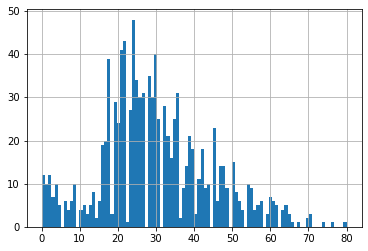

In [23]:
# Étudions l'age des passagers
df['age'].hist(bins=len(df['age'].unique()))

<AxesSubplot:>

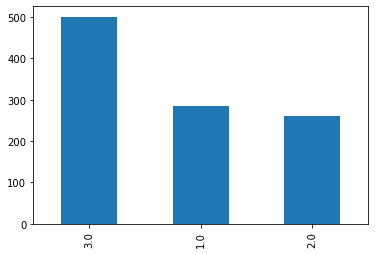

In [24]:
# Comptons le nombre de passagers dans les différentes classes
df['pclass'].value_counts().plot.bar()

Faisons des catégories d'age, commençons par des catégories avec un écart fixe :

<AxesSubplot:>

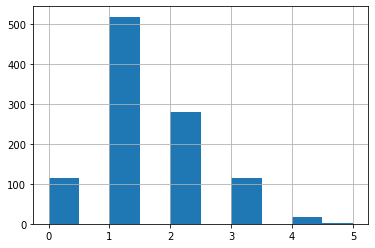

In [25]:
nb_cat = 5
df['age_cat'] = df['age'] // (df['age'].max()/nb_cat)

df['age_cat'].hist()

Faisons des catégories avec un écart inégal. On peut utiliser deux méthodes :

<AxesSubplot:>

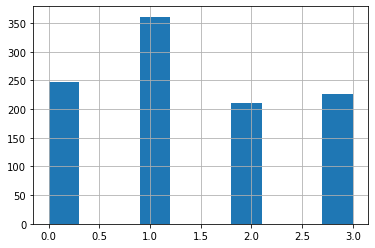

In [26]:
# En utilisant loc
df.loc[df['age'] <= 20, 'age_cat'] = 0
df.loc[(df['age'] > 20) & (df['age'] <= 30), 'age_cat'] = 1
df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age_cat'] = 2
df.loc[(df['age'] > 40), 'age_cat'] = 3

df.age_cat.hist()

<AxesSubplot:>

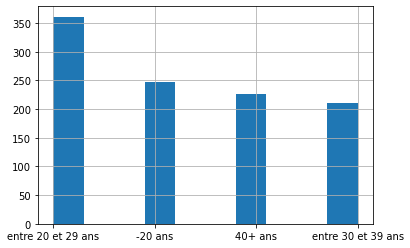

In [27]:
# En créant une fonction et en utilisant map
def categories(age):
    if age <= 20:
        return '-20 ans'
    elif 20 < age <= 30:
        return 'entre 20 et 29 ans'
    elif 30 < age <= 40:
        return 'entre 30 et 39 ans'
    else:
        return '40+ ans'
    
df.age_cat = df.age.map(categories)
df.age_cat.hist()

<AxesSubplot:>

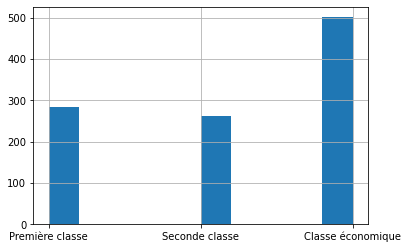

In [28]:
# Essayons de la même manière de changer les classes en texte :
df['pclass_cat'] = df.pclass.map({
        1: 'Première classe',
        2: 'Seconde classe',
        3: 'Classe économique'
    })

df.pclass_cat.hist()

On peut noter que ça revient au même que :
```python
def categories_classe(classe):
    cat_class = {
        1: 'Première classe',
        2: 'Seconde classe',
        3: 'Classe économique'
    }
    
    return cat_class.get(classe)
```

Enfin, si l'on souhaite plutot utiliser des chiffres, par exemple pour le genre, on peut une nouvelle fois utiliser map, avec ce dictionnaire : `{'male': 0, 'female': 1}`, mais aussi replace :
```python
df['sex'].replace(['male', 'female'], [0, 1])
```

ou encore `astype().cat.codes` :

In [29]:
df['cat_sex'] = df.sex.astype('category').cat.codes
df.head()

,pclass,survived,name,sex,age,age_cat,pclass_cat,cat_sex
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,entre 20 et 29 ans,Première classe,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,-20 ans,Première classe,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,-20 ans,Première classe,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,entre 20 et 29 ans,Première classe,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,entre 20 et 29 ans,Première classe,0


[Back to top](#top)

---

## 5. Pandas & Timeseries<a id="chap5Pandas"></a>

Faisons joujou avec ces données : [BTC - EUR](https://finance.yahoo.com/quote/BTC-EUR/history?p=BTC-EUR)

In [30]:
# Load des datas et set de l'index avec Date
df = pd.read_csv(find_file('BTC-EUR.csv'), index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-18,9253.401367,9316.917969,9240.340820,9246.486328,9246.486328,1.466026e+10
2019-09-19,9248.524414,9319.454102,8917.574219,9292.973633,9292.973633,1.804724e+10
2019-09-20,9292.886719,9334.069336,9194.604492,9239.483398,9239.483398,1.337076e+10
2019-09-21,9241.304688,9245.341797,9075.292969,9092.541992,9092.541992,1.218296e+10
2019-09-22,9096.534180,9142.628906,9004.768555,9138.951172,9138.951172,1.197878e+10


<AxesSubplot:xlabel='Date'>

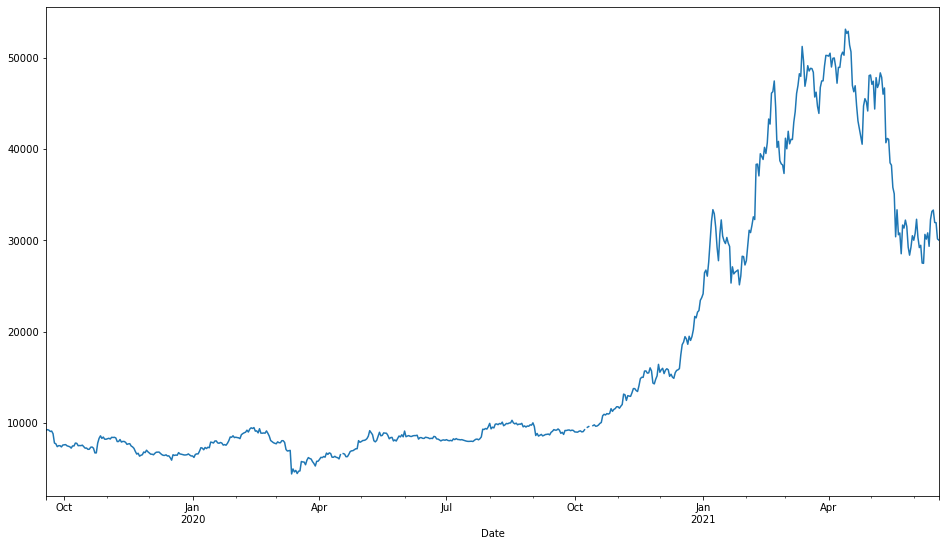

In [31]:
df.loc[:, 'Close'].plot(figsize=(16, 9))

<AxesSubplot:xlabel='Date'>

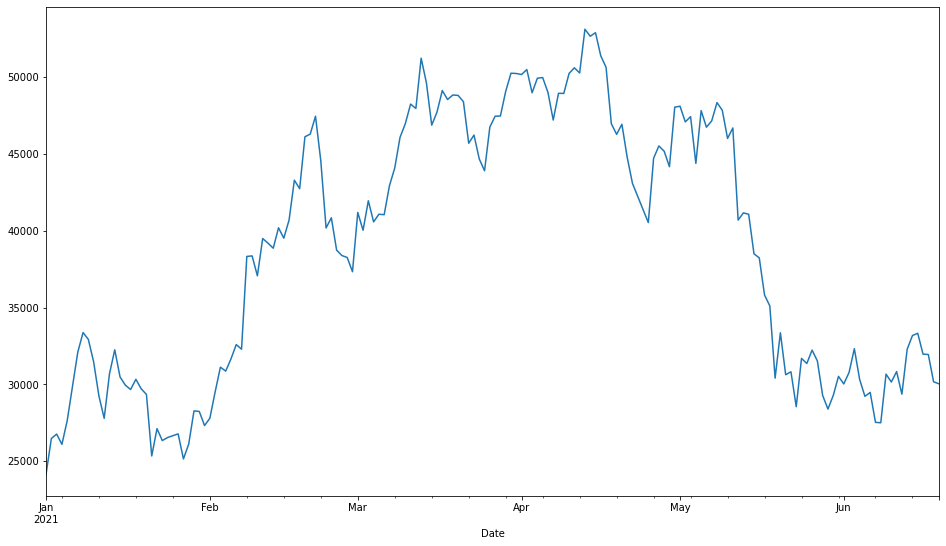

In [32]:
# Recentrons nous sur 2021
df.loc['2021', 'Close'].plot(figsize=(16, 9))

<AxesSubplot:xlabel='Date'>

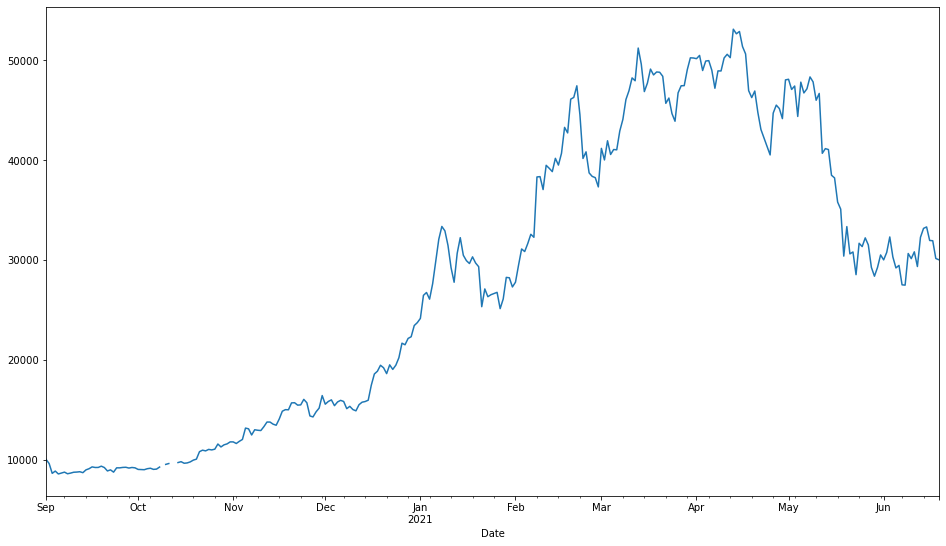

In [33]:
# Prenons un peu avant
df.loc['2020-09':, 'Close'].plot(figsize=(16, 9))

Date
2020-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2021-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2021-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Close, dtype: object

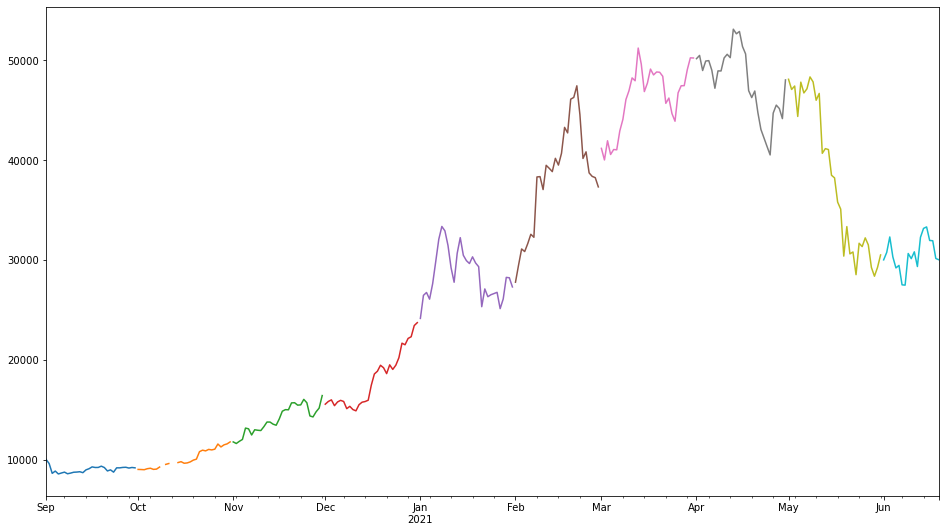

In [34]:
# On peut regrouper par années, mois, semaines, jours, heures...
df.loc['2020-09':, 'Close'].resample('M').plot(figsize=(16, 9))

<function matplotlib.pyplot.show(close=None, block=None)>

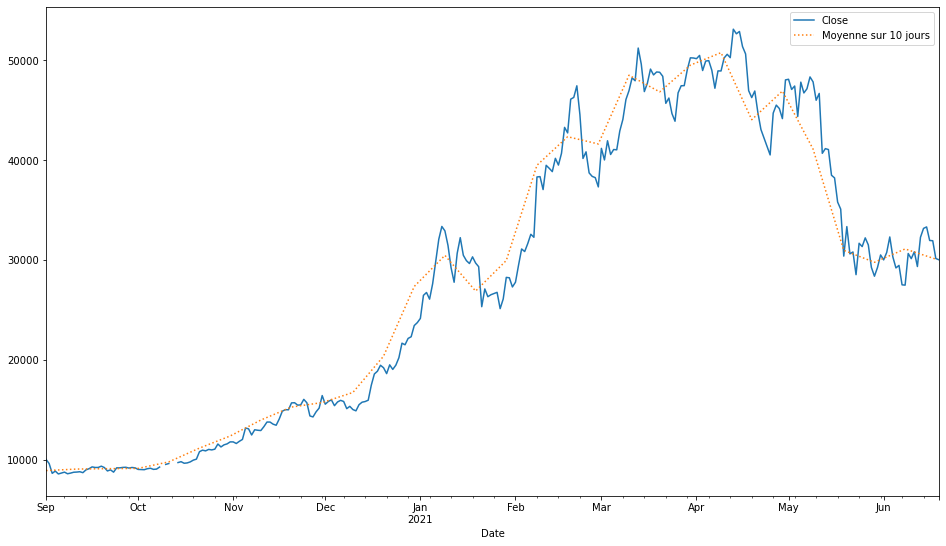

In [35]:
# moyenne par 10 jours
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

df.loc['2020-09':, 'Close'].plot()
df.loc['2020-09':, 'Close'].resample('10D').mean().plot(label='Moyenne sur 10 jours', ls=':')

plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

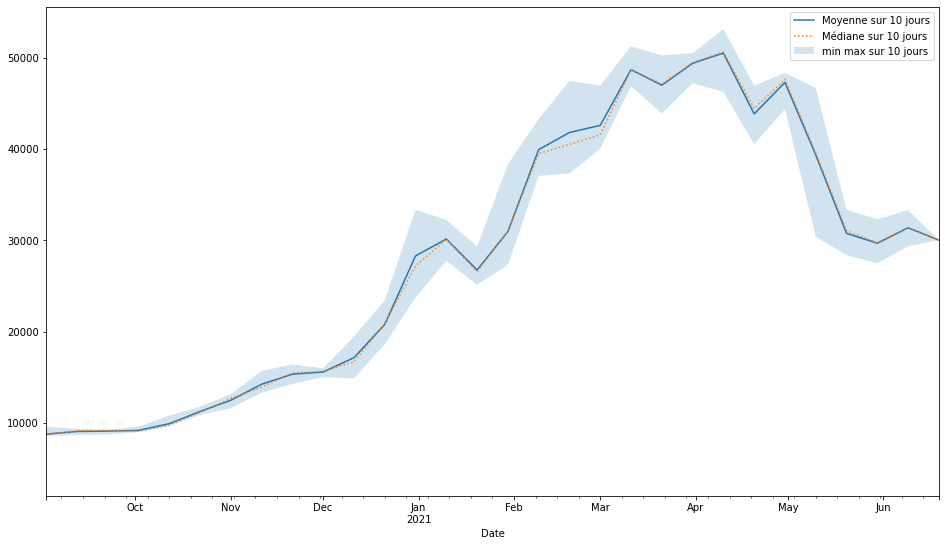

In [36]:
# Aggregation :
aggreg = df.loc[:, 'Close'].resample('10D').agg(['mean', 'std', 
                                                          'min', 'median', 'max'])


plt.figure(figsize=(16, 9))

aggreg.loc['2020-09':, 'mean'].plot(label='Moyenne sur 10 jours')
aggreg.loc['2020-09':, 'median'].plot(label='Médiane sur 10 jours', ls=':')
plt.fill_between(aggreg.index, aggreg['max'], aggreg['min'],
                 alpha=.2, label='min max sur 10 jours')

plt.legend()
plt.show

Moving average / fonction roulante, on fait la moyenne sur n jours, puis à chaque fois que l'on se décale de 1 jour, on la recalcul pour les n derniers jours :

<AxesSubplot:xlabel='Date'>

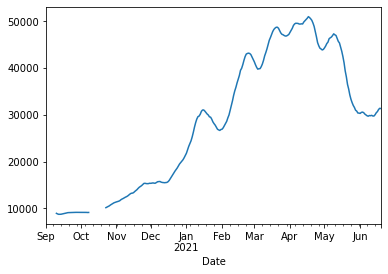

In [37]:
# sur 10 jours
df.loc['2020-09':, 'Close'].rolling(window=10).mean().plot()

<function matplotlib.pyplot.show(close=None, block=None)>

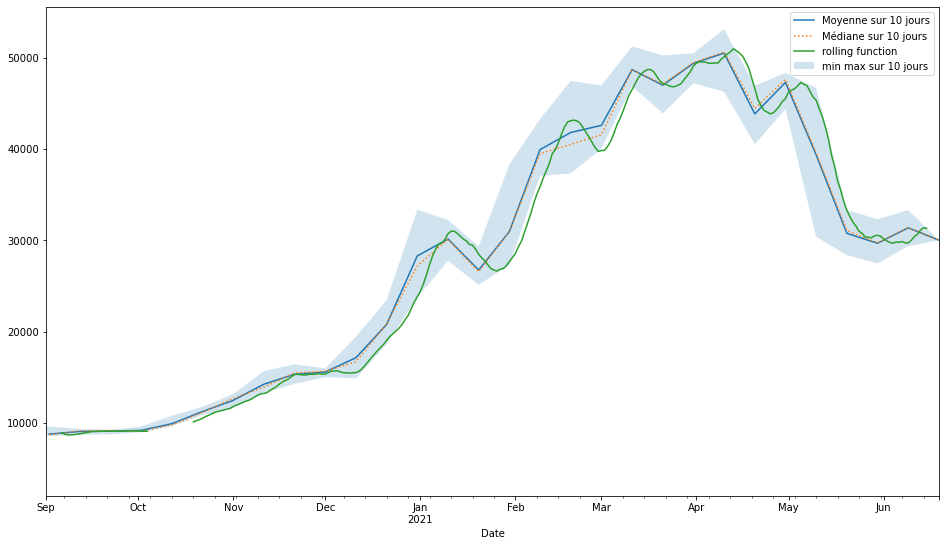

In [38]:
# Reprenons notre ancien graphe
plt.figure(figsize=(16, 9))

aggreg.loc['2020-09':, 'mean'].plot(label='Moyenne sur 10 jours')
aggreg.loc['2020-09':, 'median'].plot(label='Médiane sur 10 jours', ls=':')
plt.fill_between(aggreg.index, aggreg['max'], aggreg['min'],
                 alpha=.2, label='min max sur 10 jours')

df.loc['2020-09':, 'Close'].rolling(window=10, center=True).mean().plot(label='rolling function')

plt.legend()
plt.show

Une fonction assez proche est `ewm`, permettant de donner plus de poids
aux valeurs récentes et moins aux vieilles

<function matplotlib.pyplot.show(close=None, block=None)>

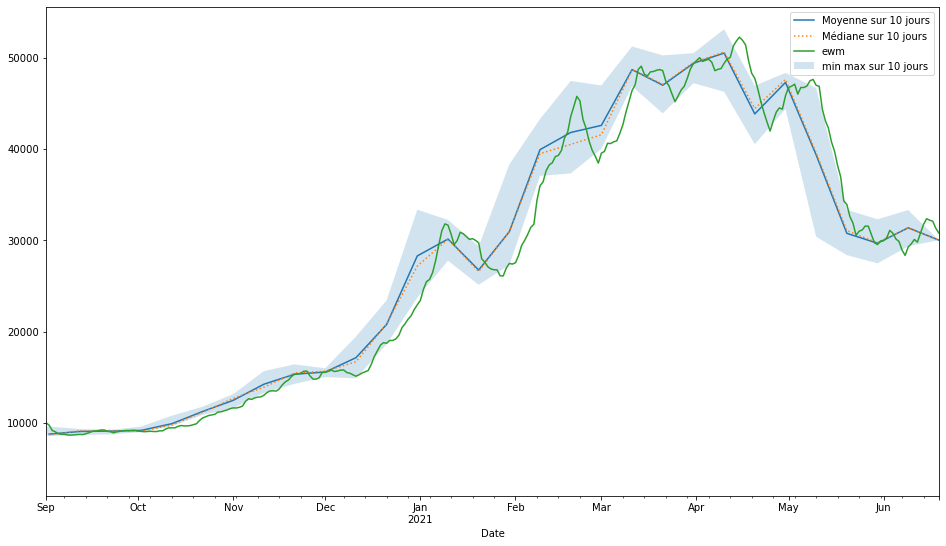

In [39]:
plt.figure(figsize=(16, 9))

aggreg.loc['2020-09':, 'mean'].plot(label='Moyenne sur 10 jours')
aggreg.loc['2020-09':, 'median'].plot(label='Médiane sur 10 jours', ls=':')
plt.fill_between(aggreg.index, aggreg['max'], aggreg['min'],
                 alpha=.2, label='min max sur 10 jours')

df.loc['2020-09':, 'Close'].ewm(alpha=.4).mean().plot(label='ewm')

plt.legend()
plt.show

[Back to top](#top)

---

## 6. Assemblage de dataframes<a id="chap6Pandas"></a>

Prenons l'Ethereum pour les comparer :

In [40]:
df_eth = pd.read_csv(find_file('ETH-EUR.csv'), index_col='Date', parse_dates=True)
df_eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-18,187.862411,196.486679,188.634079,191.664566,191.664566,8.336536e+09
2019-09-19,191.532379,201.739441,185.277878,200.299454,200.299454,9.613097e+09
2019-09-20,200.108246,201.092926,195.249847,197.872787,197.872787,7.285106e+09
2019-09-21,197.734238,200.511932,195.105133,195.573410,195.573410,7.026783e+09
2019-09-22,195.546509,196.099777,188.439224,191.978912,191.978912,7.090220e+09


<AxesSubplot:xlabel='Date'>

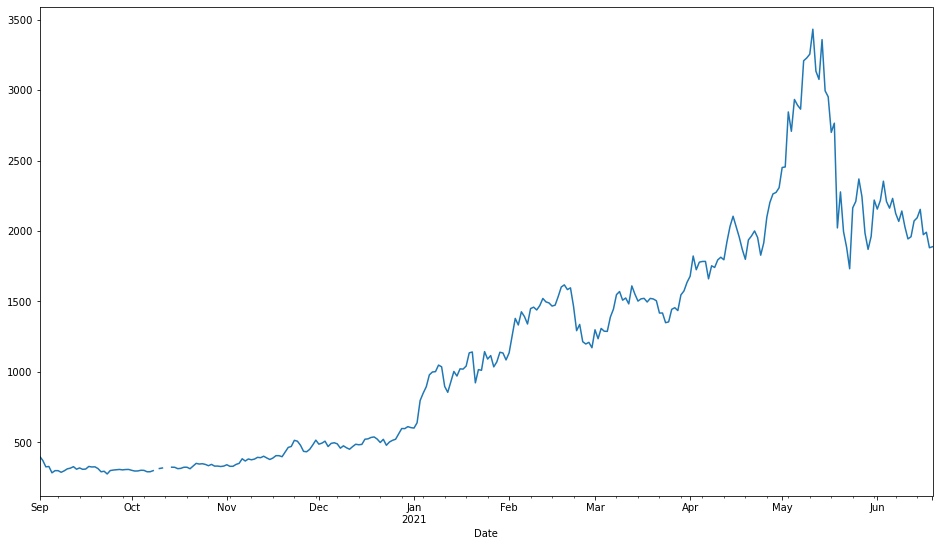

In [41]:
df_eth.loc['2020-09':, 'Close'].plot(figsize=(16, 9))

On va merge les deux df selon leurs dates. On va utiliser Inner pour prendre que les dates qu'ils ont en commun. Si on prend outer, on prend toutes les données et quand on peut, on combine les dates. Il existe d'autres mots clefs que je vous laisse tester !

In [42]:
btc_eth = pd.merge(df, df_eth, on='Date', how='inner', suffixes=('_btc', '_eth'))
btc_eth

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2019-09-18,9253.401367,9316.917969,9240.340820,9246.486328,9246.486328,1.466026e+10,187.862411,196.486679,188.634079,191.664566,191.664566,8.336536e+09
2019-09-19,9248.524414,9319.454102,8917.574219,9292.973633,9292.973633,1.804724e+10,191.532379,201.739441,185.277878,200.299454,200.299454,9.613097e+09
2019-09-20,9292.886719,9334.069336,9194.604492,9239.483398,9239.483398,1.337076e+10,200.108246,201.092926,195.249847,197.872787,197.872787,7.285106e+09
2019-09-21,9241.304688,9245.341797,9075.292969,9092.541992,9092.541992,1.218296e+10,197.734238,200.511932,195.105133,195.573410,195.573410,7.026783e+09
2019-09-22,9096.534180,9142.628906,9004.768555,9138.951172,9138.951172,1.197878e+10,195.546509,196.099777,188.439224,191.978912,191.978912,7.090220e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,33350.675781,34060.750000,32670.287109,33325.593750,33325.593750,3.828562e+10,2134.792969,2176.414063,2073.995117,2153.404053,2153.404053,2.392248e+10
2021-06-16,33129.648438,33403.488281,31836.445313,31969.333984,31969.333984,3.269011e+10,2098.910400,2106.996582,1963.514282,1973.883179,1973.883179,2.009339e+10
2021-06-17,31964.630859,33063.339844,31455.691406,31943.062500,31943.062500,3.113987e+10,1973.585571,2057.066162,1940.430176,1991.117798,1991.117798,1.835960e+10


<AxesSubplot:xlabel='Date'>

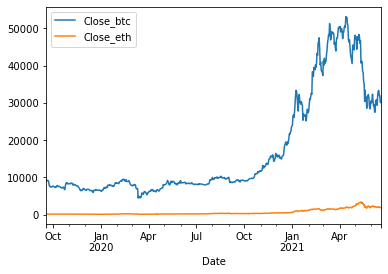

In [43]:
btc_eth[['Close_btc', 'Close_eth']].plot()

Bon, leurs valeurs étant très différentes, divisons les plots :

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

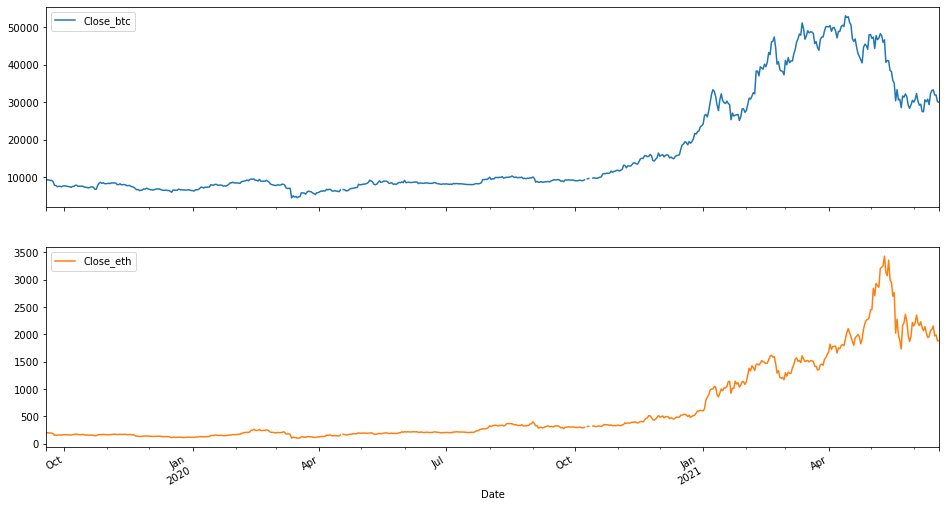

In [44]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(16, 9))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

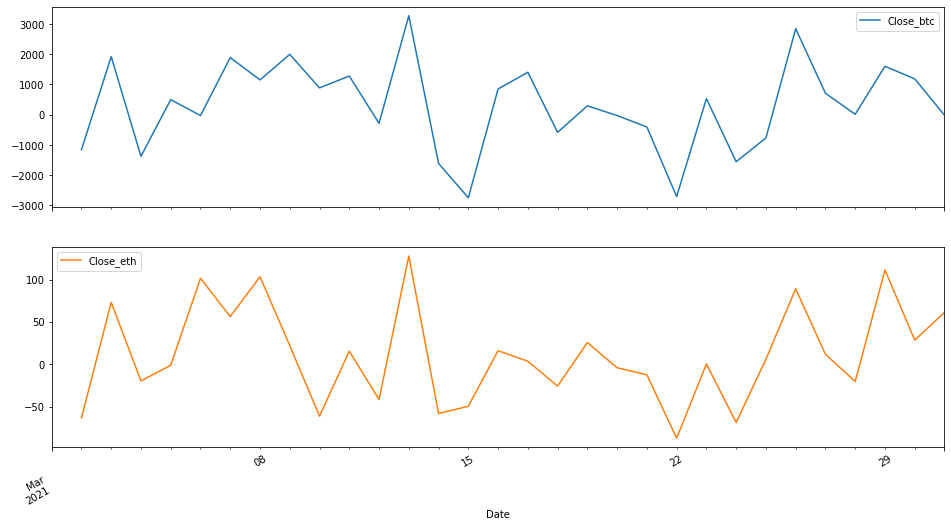

In [45]:
# Voyons aussi les différences de chacun :
btc_eth.loc['2021-03', ['Close_btc', 'Close_eth']].diff().plot(subplots=True, figsize=(16, 9))

On dirais qu'il existe une certaine corrélation entre les datas, étudions cela :

In [46]:
btc_eth.loc[:,['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.902997
Close_eth,0.902997,1.000000


On a une correlation de 90%, c'est vraiment bien !

[Back to top](#top)

---

## Trading : Turtle strategy<a id="exo1Pandas"></a>

on va étudier sur 2 semaines quand était-il intéressant d'acheter ou de vendre :

In [47]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
import numpy as np

In [49]:
nb_days = 14

In [50]:
df['Buy'] = np.zeros(len(df))
df['Sell'] = np.zeros(len(df))

df['Rolling_max'] = df.loc['2020-09':, 'Close'].shift(1).rolling(window=nb_days).max()
df['Rolling_min'] = df.loc['2020-09':, 'Close'].shift(1).rolling(window=nb_days).min()

In [51]:
df.loc[df['Close'] > df['Rolling_max'], 'Buy'] = 1
df.loc[df['Close'] < df['Rolling_min'], 'Sell'] = -1

<function matplotlib.pyplot.show(close=None, block=None)>

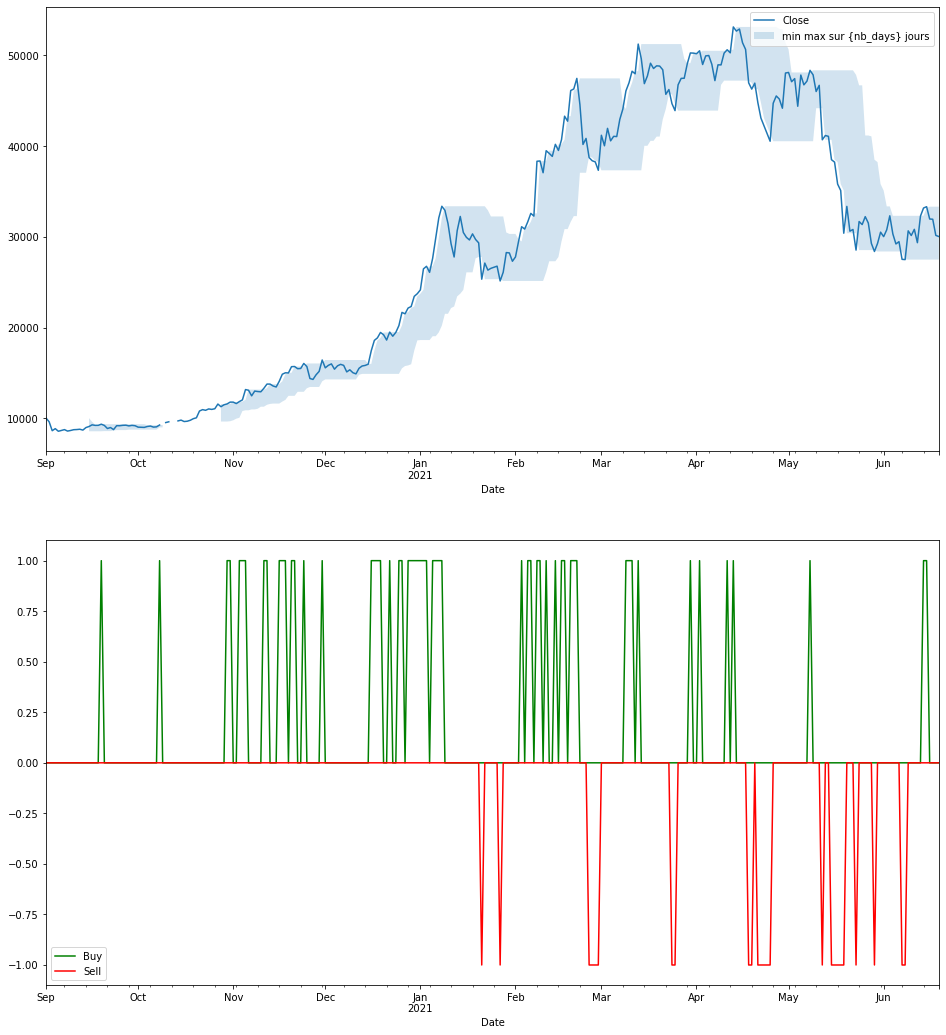

In [52]:
plt.figure(figsize=(16, 18))

plt.subplot(2, 1, 1)
df.loc['2020-09':, 'Close'].plot(label='Close')
plt.fill_between(df.index, df['Rolling_max'], df['Rolling_min'],
                 alpha=.2, label='min max sur {nb_days} jours')
plt.legend()

plt.subplot(2, 1, 2)
df.loc['2020-09':, 'Buy'].plot(label='Buy', c='g')
df.loc['2020-09':, 'Sell'].plot(label='Sell', c='r')
plt.legend()
plt.show

[Back to top](#top)

---

Thibault **Santonja**

2021